Line from (7.0841582942, -8.8832535266) to (11.362107725, 0.0)
Line from (11.362107725, 0.0) to (7.0841582942, 8.8832535266)
Line from (7.0841582942, 8.8832535266) to (-2.5283068227, 11.0772359623)
Line from (-2.5283068227, 11.0772359623) to (-10.236905334, 4.929833784)
Line from (-10.236905334, 4.929833784) to (-10.236905334, -4.929833784)
Line from (-10.236905334, -4.929833784) to (-2.5283068227, -11.0772359623)
Line from (-2.5283068227, -11.0772359623) to (7.0841582942, -8.8832535266)


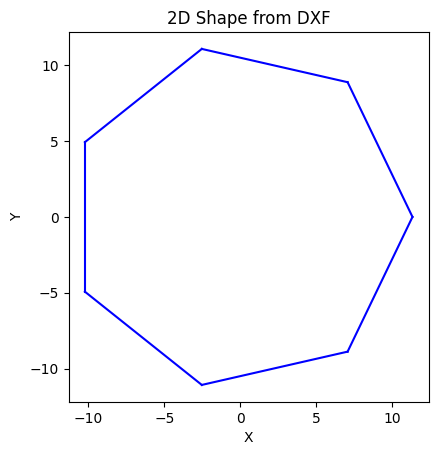

In [7]:
import ezdxf
import matplotlib.pyplot as plt
import numpy as np

# 读取DXF文件
dxf_file = 'seven.DXF'  # 直接使用文件名
doc = ezdxf.readfile(dxf_file)

# 创建一个图形窗口
fig, ax = plt.subplots()

# 获取模型空间中的所有线条
for entity in doc.modelspace():  # 直接迭代模型空间中的实体
    if entity.dxftype() == 'LINE':  # 如果是线段
        # 获取线段的起始和终止点
        start_point = entity.dxf.start
        end_point = entity.dxf.end
        print(f"Line from ({start_point.x}, {start_point.y}) to ({end_point.x}, {end_point.y})")

        # 将线段绘制到图形中
        ax.plot([start_point.x, end_point.x], [start_point.y, end_point.y], 'b-')

# 设置坐标轴比例和显示范围
ax.set_aspect('equal', 'box')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('2D Shape from DXF')

# 显示图形
plt.show()


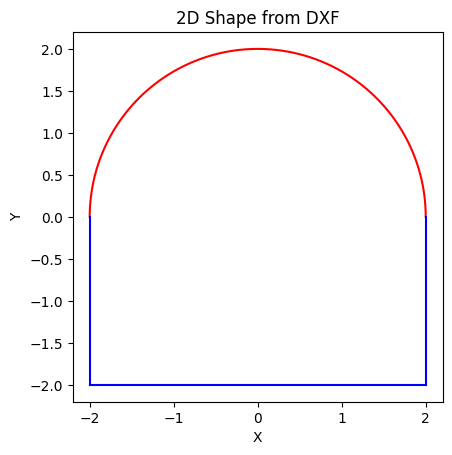

In [9]:
import ezdxf
import matplotlib.pyplot as plt
import numpy as np

# 读取DXF文件
dxf_file = 'cir_squre.DXF'  # 文件名
doc = ezdxf.readfile(dxf_file)

# 创建一个图形窗口
fig, ax = plt.subplots()

# 遍历模型空间中的所有实体
for entity in doc.modelspace():
    if entity.dxftype() == 'LINE':  # 处理线段
        start_point = entity.dxf.start
        end_point = entity.dxf.end
        # 绘制线段
        ax.plot([start_point.x, end_point.x], [start_point.y, end_point.y], 'b-', label="Line")
    
    elif entity.dxftype() == 'ARC':  # 处理圆弧
        center = entity.dxf.center
        radius = entity.dxf.radius
        start_angle = entity.dxf.start_angle
        end_angle = entity.dxf.end_angle
        # 生成圆弧的点
        theta = np.linspace(np.radians(start_angle), np.radians(end_angle), 100)
        x = center.x + radius * np.cos(theta)
        y = center.y + radius * np.sin(theta)
        # 绘制圆弧
        ax.plot(x, y, 'r-', label="Arc")

# 设置坐标轴比例和显示范围
ax.set_aspect('equal', 'box')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('2D Shape from DXF')

# 显示图形
plt.show()


arc
(0.0, 0.0, 0.0)
2.000000000000016
0.0
3.141592781770264
6.283185563540578
line
(-2.0, -2.564e-07, 0.0)
(-2.0, -2.0000002564, 0.0)
2.0
line
(-2.0, -2.0000002564, 0.0)
(2.0, -2.0000002564, 0.0)
4.0
line
(2.0, 0.0, 0.0)
(2.0, -2.0000002564, 0.0)
2.0000002564

original_points

test_points
[1.83995887 0.78393325]
[1.80690085 0.85738516]
[1.77091203 0.92944638]
[1.73205079 1.00000004]
[1.69038015 1.06893169]
[1.6459677  1.13612953]
[1.5988855  1.20148457]
[1.54920989 1.26489079]
[1.49702146 1.32624536]
[1.44240485 1.38544875]
[1.38544866 1.44240494]
result
type
圆弧
圆心
2.0
1.0
半径
2.0
type
圆弧
圆心
2.0
1.0
半径
2.0
type
圆弧
圆心
2.0
1.0
半径
2.0
type
圆弧
圆心
2.0
1.0
半径
2.0
type
圆弧
圆心
2.0
1.0
半径
2.0
type
圆弧
圆心
2.0
1.0
半径
2.0
type
圆弧
圆心
2.0
1.0
半径
2.0
type
圆弧
圆心
2.0
1.0
半径
2.0
type
圆弧
圆心
2.0
1.0
半径
2.0


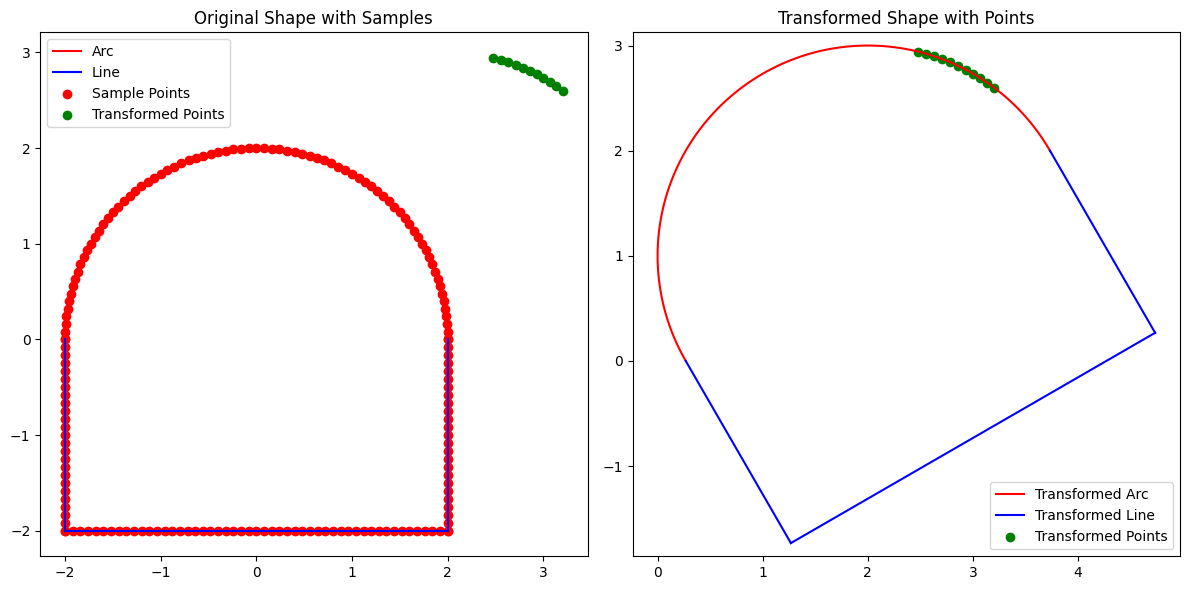

: 

In [ ]:
import ezdxf
import numpy as np
import matplotlib.pyplot as plt
def collect_edges(dxf_file):
    doc = ezdxf.readfile(dxf_file)
    edges = []
    for entity in doc.modelspace():
        if entity.dxftype() == 'LINE':
            start = entity.dxf.start
            end = entity.dxf.end
            length = np.linalg.norm([end.x - start.x, end.y - start.y])
            edges.append(('line', (start, end), length))
        elif entity.dxftype() == 'ARC':
            center = entity.dxf.center
            radius = entity.dxf.radius
            start_angle = np.radians(entity.dxf.start_angle)
            end_angle = np.radians(entity.dxf.end_angle)
            if end_angle < start_angle:
                end_angle += 2 * np.pi
            angle_diff = end_angle - start_angle
            length = radius * angle_diff
            edges.append(('arc', (center, radius, start_angle, end_angle), length))
    return edges

def sample_points(edges, n):
    total_length = sum(edge[2] for edge in edges)
    samples = []
    for _ in range(n):
        r = np.random.uniform(0, total_length)
        current = 0
        for edge in edges:
            if current + edge[2] >= r:
                if edge[0] == 'line':
                    start, end = edge[1]
                    t = (r - current) / edge[2]
                    x = start.x + t * (end.x - start.x)
                    y = start.y + t * (end.y - start.y)
                else:
                    center, radius, s_angle, e_angle = edge[1]
                    t = (r - current) / edge[2]
                    angle = s_angle + t * (e_angle - s_angle)
                    x = center.x + radius * np.cos(angle)
                    y = center.y + radius * np.sin(angle)
                samples.append([x, y])
                break
            current += edge[2]
    return np.array(samples)

def sample_points_uniform(edges, n):
    total_length = sum(edge[2] for edge in edges)
    if total_length == 0 or n == 0:
        return np.array([])
    
    # 计算每个边应分配的浮点数量
    float_points = [edge[2] / total_length * n for edge in edges]
    # 初始整数部分和余数
    points_per_edge = [int(fp) for fp in float_points]
    remainders = [fp - ip for fp, ip in zip(float_points, points_per_edge)]
    
    current_total = sum(points_per_edge)
    delta = n - current_total
    
    # 调整余数分配
    if delta != 0:
        sorted_indices = sorted(range(len(remainders)), key=lambda i: -remainders[i])
        for i in range(abs(delta)):
            idx = sorted_indices[i]
            if delta > 0:
                points_per_edge[idx] += 1
            else:
                points_per_edge[idx] -= 1
    
    samples = []
    for edge, k in zip(edges, points_per_edge):
        if k <= 0:
            continue
        if edge[0] == 'line':
            start, end = edge[1]
            t_values = np.linspace(0, 1, k)
            for t in t_values:
                x = start.x + t * (end.x - start.x)
                y = start.y + t * (end.y - start.y)
                samples.append([x, y])
        else:
            center, radius, s_angle, e_angle = edge[1]
            angle_values = np.linspace(s_angle, e_angle, k)
            for angle in angle_values:
                x = center.x + radius * np.cos(angle)
                y = center.y + radius * np.sin(angle)
                samples.append([x, y])
    
    return np.array(samples)



def create_transform_matrix(scale=1, theta=0, tx=0, ty=0):
    ct = np.cos(theta)
    st = np.sin(theta)
    return np.array([
        [scale*ct, -scale*st, tx],
        [scale*st, scale*ct, ty],
        [0,        0,        1]
    ])
    
def print_all_elements(array):
    for element in array:
        if isinstance(element, (list, tuple)):
            print_all_elements(element)
        elif isinstance(element, dict):
            # 打印字典内容，转换为列表形式以避免只打印键
            print_all_elements(list(element.items()))
        else:
            print(element)
            
def process_points(points):
    results = []
    for i in range(len(points) - 2):
        p1 = points[i]
        p2 = points[i+1]
        p3 = points[i+2]
        x1, y1 = p1
        x2, y2 = p2
        x3, y3 = p3
        
        # 判断是否共线
        area = (x2 - x1) * (y3 - y1) - (y2 - y1) * (x3 - x1)
        if abs(area) < 1e-9:
            # 处理直线
            start = (round(x1, 2), round(y1, 2))
            end = (round(x3, 2), round(y3, 2))
            A = round(y3 - y1, 2)
            B = round(x1 - x3, 2)
            C = round((x3 - x1)*y1 - (y3 - y1)*x1, 2)
            equation = f"{A:.2f}x + {B:.2f}y + {C:.2f} = 0"
            results.append({
                "type": "直线",
                "start": start,
                "end": end,
                "equation": equation
            })
        else:
            # 处理圆弧
            a1 = x2 - x1
            b1 = y2 - y1
            c1 = (x2**2 - x1**2 + y2**2 - y1**2) / 2
            a2 = x3 - x2
            b2 = y3 - y2
            c2 = (x3**2 - x2**2 + y3**2 - y2**2) / 2
            
            D = a1 * b2 - a2 * b1
            h = (b2 * c1 - b1 * c2) / D
            k = (a1 * c2 - a2 * c1) / D
            r = ((h - x1)**2 + (k - y1)**2)**0.5
            
            h = round(h, 2)
            k = round(k, 2)
            r = round(r, 2)
            results.append({
                "type": "圆弧",
                "圆心": (h, k),
                "半径": r
            })
    return results


# 读取DXF文件并获取变换参数
dxf_file = 'cir_squre.DXF'
edges = collect_edges(dxf_file)
print_all_elements(edges)
doc = ezdxf.readfile(dxf_file)  # 重新读取用于绘图
transform_matrix = create_transform_matrix(scale=1, theta=np.radians(30), tx=2, ty=1)

# 采样和应用变换
original_points = sample_points_uniform(edges, 180)
print("\noriginal_points")
#print(f"\n{original_points[0][0]}, {original_points[0][1]}")
#print(f"\nPoint (2): ({original_points[1][0]}, {original_points[1][1]})")
#print_all_elements(original_points)

test_points = original_points[10:20+1]  # 包含a和b索引的行
print("\ntest_points")
print_all_elements(test_points)

homogeneous = np.column_stack([test_points, np.ones(len(test_points))])
#print("\nhomogeneous")
#print_all_elements(homogeneous)
transformed_points = (homogeneous @ transform_matrix.T)[:, :2]

result = process_points(transformed_points)
print("\rresult")
print_all_elements(result)


# 可视化设置
plt.figure(figsize=(12, 6))

# 左侧子图：原始图形和点
plt.subplot(121)
# 绘制原始图形
plotted_line, plotted_arc = False, False
for entity in doc.modelspace():
    if entity.dxftype() == 'LINE':
        start = entity.dxf.start
        end = entity.dxf.end
        plt.plot([start.x, end.x], [start.y, end.y], 
                'b-', label='Line' if not plotted_line else "")
        plotted_line = True
    elif entity.dxftype() == 'ARC':
        center = entity.dxf.center
        radius = entity.dxf.radius
        start_angle = entity.dxf.start_angle
        end_angle = entity.dxf.end_angle
        if end_angle < start_angle:
            end_angle += 360
        theta = np.linspace(start_angle, end_angle, 100)
        theta_rad = np.radians(theta)
        x = center.x + radius * np.cos(theta_rad)
        y = center.y + radius * np.sin(theta_rad)
        plt.plot(x, y, 'r-', label='Arc' if not plotted_arc else "")
        plotted_arc = True
plt.scatter(original_points[:, 0], original_points[:, 1], c='r', label='Sample Points')
plt.scatter(transformed_points[:, 0], transformed_points[:, 1], c='g', label='Transformed Points')
plt.title("Original Shape with Samples")
plt.axis('equal')
plt.legend()

# 右侧子图：变换后的图形和点
plt.subplot(122)
# 绘制变换后的图形
plotted_tline, plotted_tarc = False, False
for entity in doc.modelspace():
    if entity.dxftype() == 'LINE':
        start = entity.dxf.start
        end = entity.dxf.end
        # 变换线段的端点
        start_t = transform_matrix @ np.array([start.x, start.y, 1])
        end_t = transform_matrix @ np.array([end.x, end.y, 1])
        plt.plot([start_t[0], end_t[0]], [start_t[1], end_t[1]], 
                'b-', label='Transformed Line' if not plotted_tline else "")
        plotted_tline = True
        
    elif entity.dxftype() == 'ARC':
        center = entity.dxf.center
        radius = entity.dxf.radius
        start_angle = entity.dxf.start_angle
        end_angle = entity.dxf.end_angle
        # 生成原始弧线点并变换
        if end_angle < start_angle:
            end_angle += 360
        theta = np.linspace(start_angle, end_angle, 100)
        theta_rad = np.radians(theta)
        x = center.x + radius * np.cos(theta_rad)
        y = center.y + radius * np.sin(theta_rad)
        # 应用变换到每个点
        points = np.column_stack([x, y, np.ones(len(x))])
        transformed = (points @ transform_matrix.T)[:, :2]
        plt.plot(transformed[:, 0], transformed[:, 1], 
                'r-', label='Transformed Arc' if not plotted_tarc else "")
        plotted_tarc = True

plt.scatter(transformed_points[:, 0], transformed_points[:, 1], c='g', label='Transformed Points')
plt.title("Transformed Shape with Points")
plt.axis('equal')
plt.legend()

plt.tight_layout()
plt.show()

最优参数：缩放=0.8229, 旋转=18.72°, 平移=(-1.25, -0.95)
对齐误差：0.0192


C:\Users\NUC\AppData\Local\Temp\ipykernel_22356\2807541709.py:256: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from current font.
  plt.tight_layout()
C:\Users\NUC\AppData\Local\Temp\ipykernel_22356\2807541709.py:256: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from current font.
  plt.tight_layout()
C:\Users\NUC\AppData\Local\Temp\ipykernel_22356\2807541709.py:256: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.tight_layout()
C:\Users\NUC\AppData\Local\Temp\ipykernel_22356\2807541709.py:256: UserWarning: Glyph 24418 (\N{CJK UNIFIED IDEOGRAPH-5F62}) missing from current font.
  plt.tight_layout()
C:\Users\NUC\AppData\Local\Temp\ipykernel_22356\2807541709.py:256: UserWarning: Glyph 21021 (\N{CJK UNIFIED IDEOGRAPH-521D}) missing from current font.
  plt.tight_layout()
C:\Users\NUC\AppData\Local\Temp\ipykernel_22356\2807541709.py:256: UserWarning: Glyph 21464 (\N{CJK UNIFIED IDEOGRAPH-53D8}) missing fr

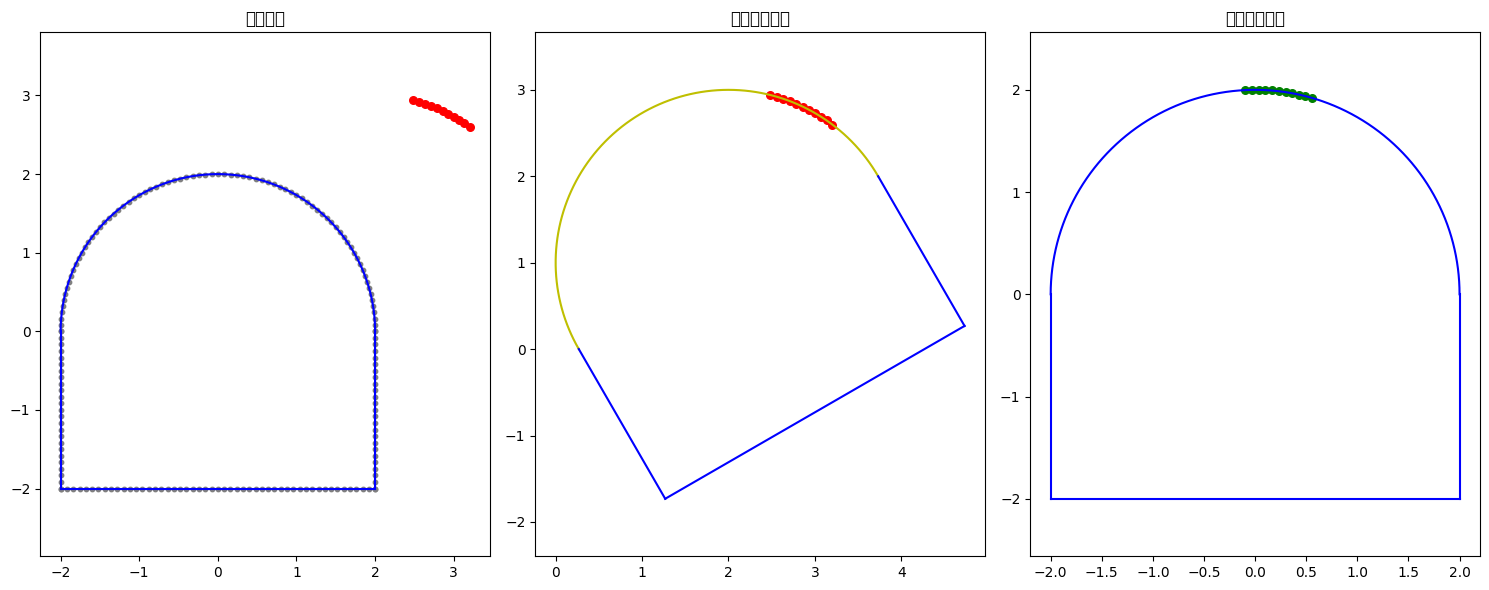

In [37]:
import ezdxf
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# -------------------- 基础功能函数 --------------------
def collect_edges(dxf_file):
    doc = ezdxf.readfile(dxf_file)
    edges = []
    for entity in doc.modelspace():
        if entity.dxftype() == 'LINE':
            start = entity.dxf.start
            end = entity.dxf.end
            length = np.linalg.norm([end.x - start.x, end.y - start.y])
            edges.append(('line', (start, end), length))
        elif entity.dxftype() == 'ARC':
            center = entity.dxf.center
            radius = entity.dxf.radius
            start_angle = np.radians(entity.dxf.start_angle)
            end_angle = np.radians(entity.dxf.end_angle)
            if end_angle < start_angle:
                end_angle += 2 * np.pi
            angle_diff = end_angle - start_angle
            length = radius * angle_diff
            edges.append(('arc', (center, radius, start_angle, end_angle), length))
    return edges

def sample_points_uniform(edges, n):
    total_length = sum(edge[2] for edge in edges)
    if total_length == 0 or n == 0:
        return np.array([])
    
    float_points = [edge[2] / total_length * n for edge in edges]
    points_per_edge = [int(fp) for fp in float_points]
    remainders = [fp - ip for fp, ip in zip(float_points, points_per_edge)]
    
    current_total = sum(points_per_edge)
    delta = n - current_total
    
    if delta != 0:
        sorted_indices = sorted(range(len(remainders)), key=lambda i: -remainders[i])
        for i in range(abs(delta)):
            idx = sorted_indices[i]
            if delta > 0:
                points_per_edge[idx] += 1
            else:
                points_per_edge[idx] -= 1
    
    samples = []
    for edge, k in zip(edges, points_per_edge):
        if k <= 0:
            continue
        if edge[0] == 'line':
            start, end = edge[1]
            t_values = np.linspace(0, 1, k)
            for t in t_values:
                x = start.x + t * (end.x - start.x)
                y = start.y + t * (end.y - start.y)
                samples.append([x, y])
        else:
            center, radius, s_angle, e_angle = edge[1]
            angle_values = np.linspace(s_angle, e_angle, k)
            for angle in angle_values:
                x = center.x + radius * np.cos(angle)
                y = center.y + radius * np.sin(angle)
                samples.append([x, y])
    
    return np.array(samples)

def create_transform_matrix(scale=1, theta=0, tx=0, ty=0):
    ct = np.cos(theta)
    st = np.sin(theta)
    return np.array([
        [scale*ct, -scale*st, tx],
        [scale*st, scale*ct, ty],
        [0,        0,        1]
    ])

# -------------------- 点对齐功能 --------------------
def distance_to_edge(point, edges):
    min_dist = np.inf
    closest_point = None
    x, y = point
    for edge in edges:
        if edge[0] == 'line':
            (start, end), length = edge[1], edge[2]
            x1, y1 = start.x, start.y
            x2, y2 = end.x, end.y
            dx, dy = x2 - x1, y2 - y1
            if dx == 0 and dy == 0:
                dist = np.hypot(x - x1, y - y1)
                cp = (x1, y1)
            else:
                t = ((x - x1)*dx + (y - y1)*dy) / (dx**2 + dy**2)
                t = np.clip(t, 0, 1)
                proj_x = x1 + t*dx
                proj_y = y1 + t*dy
                dist = np.hypot(x - proj_x, y - proj_y)
                cp = (proj_x, proj_y)
        elif edge[0] == 'arc':
            (center, radius, s_angle, e_angle), length = edge[1], edge[2]
            cx, cy = center.x, center.y
            angle = np.arctan2(y - cy, x - cx)
            angle_diff = e_angle - s_angle
            if angle_diff < 0:
                angle_diff += 2*np.pi
            angle_rel = (angle - s_angle) % (2*np.pi)
            if angle_rel > angle_diff:
                d1 = np.hypot(x - (cx + radius*np.cos(s_angle)), y - (cy + radius*np.sin(s_angle)))
                d2 = np.hypot(x - (cx + radius*np.cos(e_angle)), y - (cy + radius*np.sin(e_angle)))
                if d1 < d2:
                    dist, cp = d1, (cx + radius*np.cos(s_angle), cy + radius*np.sin(s_angle))
                else:
                    dist, cp = d2, (cx + radius*np.cos(e_angle), cy + radius*np.sin(e_angle))
            else:
                proj_x = cx + radius * np.cos(angle)
                proj_y = cy + radius * np.sin(angle)
                dist = np.hypot(x - proj_x, y - proj_y)
                cp = (proj_x, proj_y)
        if dist < min_dist:
            min_dist = dist
            closest_point = cp
    return min_dist, closest_point

def objective_function(params, points_to_align, edges):
    scale, theta, tx, ty = params
    transform = create_transform_matrix(scale, theta, tx, ty)
    homogeneous = np.column_stack([points_to_align, np.ones(len(points_to_align))])
    points_transformed = (homogeneous @ transform.T)[:, :2]
    total_error = 0
    for pt in points_transformed:
        dist, _ = distance_to_edge(pt, edges)
        total_error += dist
    return total_error

def find_optimal_transform(points_to_align, edges):
    initial_guess = [1.0, 0.0, 0.0, 0.0]
    bounds = [
        (0.5, 2.0),    # scale
        (-np.pi, np.pi), # theta
        (-10, 10),     # tx
        (-10, 10)      # ty
    ]
    result = minimize(
        objective_function,
        initial_guess,
        args=(points_to_align, edges),
        method='L-BFGS-B',
        bounds=bounds,
        options={'maxiter': 100}
    )
    return result.x, result.fun

def align_points(points_to_align, edges):
    params, error = find_optimal_transform(points_to_align, edges)
    scale, theta, tx, ty = params
    transform = create_transform_matrix(scale, theta, tx, ty)
    homogeneous = np.column_stack([points_to_align, np.ones(len(points_to_align))])
    aligned_points = (homogeneous @ transform.T)[:, :2]
    
    # 验证解的唯一性
    alt_params, alt_error = find_optimal_transform(aligned_points, edges)
    if np.abs(alt_error - error) > 1e-3:
        print("警告：检测到多个可能解，请添加更多参考点！")
    
    print(f"最优参数：缩放={scale:.4f}, 旋转={np.degrees(theta):.2f}°, 平移=({tx:.2f}, {ty:.2f})")
    print(f"对齐误差：{error:.4f}")
    return aligned_points

# -------------------- 主程序 --------------------
if __name__ == "__main__":
    # 读取DXF文件
    dxf_file = 'cir_squre.DXF'
    edges = collect_edges(dxf_file)
    doc = ezdxf.readfile(dxf_file)
    
    # 生成采样点
    original_points = sample_points_uniform(edges, 180)
    test_points = original_points[10:21]  # 选取第10-20个点
    
    # 应用初始变换
    transform_matrix = create_transform_matrix(scale=1, theta=np.radians(30), tx=2, ty=1)
    homogeneous = np.column_stack([test_points, np.ones(len(test_points))])
    transformed_points = (homogeneous @ transform_matrix.T)[:, :2]
    
    # 执行点对齐
    aligned_points = align_points(transformed_points, edges)
    
    # 可视化
    plt.figure(figsize=(15, 6))
    
    # 原始图形
    plt.subplot(131)
    for entity in doc.modelspace():
        if entity.dxftype() == 'LINE':
            start, end = entity.dxf.start, entity.dxf.end
            plt.plot([start.x, end.x], [start.y, end.y], 'b-')
        elif entity.dxftype() == 'ARC':
            center = entity.dxf.center
            radius = entity.dxf.radius
            angles = np.linspace(entity.dxf.start_angle, entity.dxf.end_angle, 100)
            x = center.x + radius * np.cos(np.radians(angles))
            y = center.y + radius * np.sin(np.radians(angles))
            plt.plot(x, y, 'b-')
    plt.scatter(original_points[:,0], original_points[:,1], c='gray', s=10, label='原始采样点')
    plt.scatter(transformed_points[:,0], transformed_points[:,1], c='r', s=30, label='变换后点')
    plt.title("原始图形")
    plt.axis('equal')
    
    # 变换后点云
    plt.subplot(132)
    for entity in doc.modelspace():
        if entity.dxftype() == 'LINE':
            start = transform_matrix @ np.array([entity.dxf.start.x, entity.dxf.start.y, 1])
            end = transform_matrix @ np.array([entity.dxf.end.x, entity.dxf.end.y, 1])
            plt.plot([start[0], end[0]], [start[1], end[1]], 'b-')
        elif entity.dxftype() == 'ARC':
            center = entity.dxf.center
            radius = entity.dxf.radius
            start_angle = entity.dxf.start_angle
            end_angle = entity.dxf.end_angle
            # 生成原始弧线点并变换
            if end_angle < start_angle:
                end_angle += 360
            theta = np.linspace(start_angle, end_angle, 100)
            theta_rad = np.radians(theta)
            x = center.x + radius * np.cos(theta_rad)
            y = center.y + radius * np.sin(theta_rad)
            # 应用变换到每个点
            points = np.column_stack([x, y, np.ones(len(x))])
            transformed = (points @ transform_matrix.T)[:, :2]
            plt.plot(transformed[:, 0], transformed[:, 1], 
                    'y-', label='Transformed Arc' if not plotted_tarc else "")
            plotted_tarc = True
        
    plt.scatter(transformed_points[:,0], transformed_points[:,1], c='r', s=30, label='变换后点')
    plt.title("初始变换结果")
    plt.axis('equal')
    
    # 对齐后点云
    plt.subplot(133)
    for entity in doc.modelspace():
        if entity.dxftype() == 'LINE':
            plt.plot([entity.dxf.start.x, entity.dxf.end.x], 
                    [entity.dxf.start.y, entity.dxf.end.y], 'b-')
        elif entity.dxftype() == 'ARC':
            center = entity.dxf.center
            angles = np.linspace(entity.dxf.start_angle, entity.dxf.end_angle, 100)
            x = center.x + entity.dxf.radius * np.cos(np.radians(angles))
            y = center.y + entity.dxf.radius * np.sin(np.radians(angles))
            plt.plot(x, y, 'b-')
    plt.scatter(aligned_points[:,0], aligned_points[:,1], c='g', s=30, label='对齐后点')
    plt.title("优化对齐结果")
    plt.axis('equal')
    
    plt.tight_layout()
    plt.show()

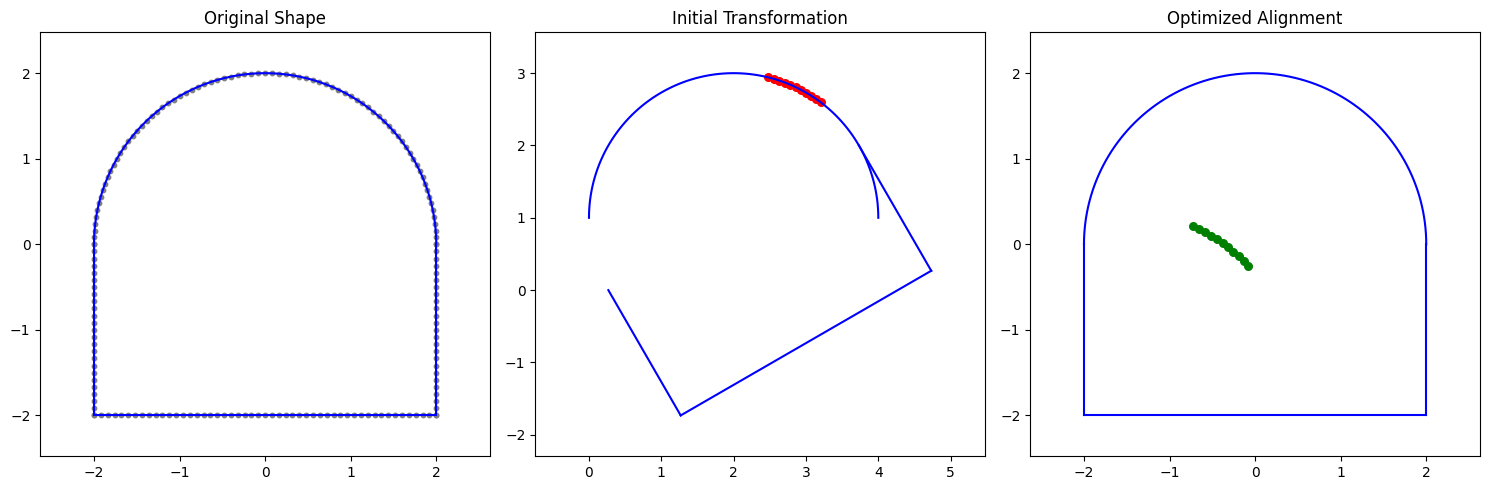

Optimal parameters:
Rotation: 19.26°
Translation: (-1.56, -1.60)
Alignment error: 0.0000


In [38]:
import ezdxf
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# -------------------- Core Functions --------------------
def collect_edges(dxf_file):
    doc = ezdxf.readfile(dxf_file)
    edges = []
    for entity in doc.modelspace():
        if entity.dxftype() == 'LINE':
            start = entity.dxf.start
            end = entity.dxf.end
            length = np.linalg.norm([end.x - start.x, end.y - start.y])
            edges.append(('line', (start, end), length))
        elif entity.dxftype() == 'ARC':
            center = entity.dxf.center
            radius = entity.dxf.radius
            start_angle = np.radians(entity.dxf.start_angle)
            end_angle = np.radians(entity.dxf.end_angle)
            if end_angle < start_angle:
                end_angle += 2 * np.pi
            angle_diff = end_angle - start_angle
            length = radius * angle_diff
            edges.append(('arc', (center, radius, start_angle, end_angle), length))
    return edges

def sample_points_uniform(edges, n):
    total_length = sum(edge[2] for edge in edges)
    if total_length == 0 or n == 0:
        return np.array([])
    
    float_points = [edge[2]/total_length*n for edge in edges]
    points_per_edge = [int(fp) for fp in float_points]
    remainders = [fp-ip for fp, ip in zip(float_points, points_per_edge)]
    
    current_total = sum(points_per_edge)
    delta = n - current_total
    
    if delta != 0:
        sorted_indices = sorted(range(len(remainders)), key=lambda i: -remainders[i])
        for i in range(abs(delta)):
            idx = sorted_indices[i]
            points_per_edge[idx] += 1 if delta > 0 else -1
    
    samples = []
    for edge, k in zip(edges, points_per_edge):
        if k <= 0: continue
        if edge[0] == 'line':
            start, end = edge[1]
            for t in np.linspace(0, 1, k):
                x = start.x + t*(end.x - start.x)
                y = start.y + t*(end.y - start.y)
                samples.append([x, y])
        else:
            center, radius, s_angle, e_angle = edge[1]
            for angle in np.linspace(s_angle, e_angle, k):
                x = center.x + radius*np.cos(angle)
                y = center.y + radius*np.sin(angle)
                samples.append([x, y])
    
    return np.array(samples)

def create_transform_matrix(theta=0, tx=0, ty=0):
    ct, st = np.cos(theta), np.sin(theta)
    return np.array([
        [ct, -st, tx],
        [st,  ct, ty],
        [0,   0,  1]
    ])

# -------------------- Alignment Functions --------------------
def distance_to_edge(point, edges):
    x, y = point
    min_dist = np.inf
    for edge in edges:
        if edge[0] == 'line':
            (start, end), _ = edge[1], edge[2]
            x1, y1, x2, y2 = start.x, start.y, end.x, end.y
            dx, dy = x2-x1, y2-y1
            if dx == dy == 0:
                dist = np.hypot(x-x1, y-y1)
            else:
                t = ((x-x1)*dx + (y-y1)*dy)/(dx**2 + dy**2)
                t = np.clip(t, 0, 1)
                px, py = x1 + t*dx, y1 + t*dy
                dist = np.hypot(x-px, y-py)
        elif edge[0] == 'arc':
            (center, radius, s_angle, e_angle), _ = edge[1], edge[2]
            cx, cy = center.x, center.y
            angle = np.arctan2(y-cy, x-cx)
            angle_diff = (e_angle - s_angle) % (2*np.pi)
            angle_rel = (angle - s_angle) % (2*np.pi)
            
            if angle_rel > angle_diff:
                d1 = np.hypot(x - (cx+radius*np.cos(s_angle)), y - (cy+radius*np.sin(s_angle)))
                d2 = np.hypot(x - (cx+radius*np.cos(e_angle)), y - (cy+radius*np.sin(e_angle)))
                dist = min(d1, d2)
            else:
                px = cx + radius*np.cos(angle)
                py = cy + radius*np.sin(angle)
                dist = np.hypot(x-px, y-py)
                
        if dist < min_dist:
            min_dist = dist
    return min_dist

def objective_function(params, points, edges):
    theta, tx, ty = params
    transform = create_transform_matrix(theta, tx, ty)
    homogeneous = np.column_stack([points, np.ones(len(points))])
    transformed = (homogeneous @ transform.T)[:, :2]
    return sum(distance_to_edge(p, edges) for p in transformed)

def optimize_alignment(points, edges):
    result = minimize(
        objective_function,
        x0=[0, 0, 0],  # Initial guess: no rotation/translation
        args=(points, edges),
        bounds=[
            (-np.pi, np.pi),  # Theta
            (-10, 10),        # tx
            (-10, 10)         # ty
        ],
        method='L-BFGS-B',
        options={'maxiter': 200}
    )
    return result.x, result.fun

# -------------------- Main Program --------------------
if __name__ == "__main__":
    # Load DXF
    dxf_file = 'cir_squre.DXF'
    edges = collect_edges(dxf_file)
    doc = ezdxf.readfile(dxf_file)
    
    # Generate points
    original_points = sample_points_uniform(edges, 180)
    test_points = original_points[10:21]  # Points 10-20
    
    # Apply initial transformation (30 degree rotation, translation (2,1))
    initial_transform = create_transform_matrix(np.radians(30), 2, 1)
    homogeneous = np.column_stack([test_points, np.ones(len(test_points))])
    transformed_points = (homogeneous @ initial_transform.T)[:, :2]
    
    # Optimize alignment
    opt_params, min_error = optimize_alignment(transformed_points, edges)
    theta_opt, tx_opt, ty_opt = opt_params
    final_transform = create_transform_matrix(theta_opt, tx_opt, ty_opt)
    aligned_points = (homogeneous @ final_transform.T)[:, :2]
    
    # Visualization
    plt.figure(figsize=(15, 5))
    
    # Original Shape
    plt.subplot(131)
    for entity in doc.modelspace():
        if entity.dxftype() == 'LINE':
            start, end = entity.dxf.start, entity.dxf.end
            plt.plot([start.x, end.x], [start.y, end.y], 'b-')
        elif entity.dxftype() == 'ARC':
            center = entity.dxf.center
            angles = np.linspace(entity.dxf.start_angle, entity.dxf.end_angle, 100)
            x = center.x + entity.dxf.radius * np.cos(np.radians(angles))
            y = center.y + entity.dxf.radius * np.sin(np.radians(angles))
            plt.plot(x, y, 'b-')
    plt.scatter(original_points[:,0], original_points[:,1], s=10, c='gray', label='Original samples')
    plt.title("Original Shape")
    plt.axis('equal')
    
    # Transformed Points
    plt.subplot(132)
    for entity in doc.modelspace():
        if entity.dxftype() == 'LINE':
            start = initial_transform @ [entity.dxf.start.x, entity.dxf.start.y, 1]
            end = initial_transform @ [entity.dxf.end.x, entity.dxf.end.y, 1]
            plt.plot([start[0], end[0]], [start[1], end[1]], 'b-')
        elif entity.dxftype() == 'ARC':
            center = initial_transform @ [entity.dxf.center.x, entity.dxf.center.y, 1]
            angles = np.linspace(entity.dxf.start_angle, entity.dxf.end_angle, 100)
            x = center[0] + entity.dxf.radius * np.cos(np.radians(angles))
            y = center[1] + entity.dxf.radius * np.sin(np.radians(angles))
            plt.plot(x, y, 'b-')
    plt.scatter(transformed_points[:,0], transformed_points[:,1], s=30, c='red', label='Transformed points')
    plt.title("Initial Transformation")
    plt.axis('equal')
    
    # Aligned Points
    plt.subplot(133)
    for entity in doc.modelspace():
        if entity.dxftype() == 'LINE':
            start, end = entity.dxf.start, entity.dxf.end
            plt.plot([start.x, end.x], [start.y, end.y], 'b-')
        elif entity.dxftype() == 'ARC':
            center = entity.dxf.center
            angles = np.linspace(entity.dxf.start_angle, entity.dxf.end_angle, 100)
            x = center.x + entity.dxf.radius * np.cos(np.radians(angles))
            y = center.y + entity.dxf.radius * np.sin(np.radians(angles))
            plt.plot(x, y, 'b-')
    plt.scatter(aligned_points[:,0], aligned_points[:,1], s=30, c='green', label='Aligned points')
    plt.title("Optimized Alignment")
    plt.axis('equal')

    plt.tight_layout()
    plt.show()

    # Print results
    print(f"Optimal parameters:\n"
          f"Rotation: {np.degrees(theta_opt):.2f}°\n"
          f"Translation: ({tx_opt:.2f}, {ty_opt:.2f})\n"
          f"Alignment error: {min_error:.4f}")

测试最新上传git